In [ ]:
import warnings
warnings.filterwarnings("ignore")
import random
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_excel(r"/content/Language_id.xlsx")
data.head()

,Sentences,language
0,in johnson was awarded an american institute ...,English
1,bussy-saint-georges has built its identity on ...,English
2,minnesotas state parks are spread across the s...,English
3,nordahl road is a station served by north coun...,English
4,a talk by takis fotopoulos about the internati...,English


In [ ]:
data=pd.DataFrame(data.Sentences)

data.head()

,Sentences
0,in johnson was awarded an american institute ...
1,bussy-saint-georges has built its identity on ...
2,minnesotas state parks are spread across the s...
3,nordahl road is a station served by north coun...
4,a talk by takis fotopoulos about the internati...


In [ ]:
data.iloc[55,0]

'the shree camp hanuman temple hindi कामप हनुमान् मन्दीर is one of the biggest hanuman temples of india it is situated in ahmedabad cantonment area in shahibaug ahmedabad gujarat this temple was established by pandit gajanan prasad around  years ago'

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [ ]:
data.text=data.Sentences.str.lower()

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño y niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del  de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta y el  de estos matrimonios musulmanes son entre primos y otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

# Step 2 :- Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                        for c in text 
                        if c not in string.punctuation])
    return text_nopunt

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño y niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del  de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta y el  de estos matrimonios musulmanes son entre primos y otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

In [ ]:
data.text=data.Sentences.apply(lambda x : remove_punctuation(x))

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño y niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del  de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta y el  de estos matrimonios musulmanes son entre primos y otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [ ]:
data.text = data.Sentences.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño y niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del  de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta y el  de estos matrimonios musulmanes son entre primos y otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

# Remove Number

In [ ]:
data.iloc[57,0]

'the farm of génitoy the name genesterium in latin or genestay in old french later génitoire or génitoy originates from the abundant genista flowers the farm was also an important fief with a castle in  madame de montespan had a baby in the castle of génitoy one of the louis xivs son louis-césar de bourbon count of vexin'

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [ ]:
data['Sentences'] = data['Sentences'].str.replace('\d+','')

In [ ]:
data.iloc[57,0]

'the farm of génitoy the name genesterium in latin or genestay in old french later génitoire or génitoy originates from the abundant genista flowers the farm was also an important fief with a castle in  madame de montespan had a baby in the castle of génitoy one of the louis xivs son louis-césar de bourbon count of vexin'

# Removing Stop Words

In [ ]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño y niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del  de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta y el  de estos matrimonios musulmanes son entre primos y otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Sentences'] = data['Sentences'].apply(lambda x: ' '.join([abc 
                                                      for abc in x.split() #
                                                      if abc not in (stop)]))

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta el de estos matrimonios musulmanes son entre primos otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

# Common Words

* manually created as per the case study

In [ ]:
data.iloc[345,0]

'otra costumbre en ciertas naciones islámicas[]\u200b[]\u200b como pakistán es el watta satta donde un par de hermanos niño niña de una misma familia se intercambian como futuros cónyuges de un par de hermanos de otra familia en otras palabras la mujer es también la hermana política para los hombres en dos familias esta costumbre lleva inherente la forma del matrimonio arreglado alrededor del de todos los matrimonios en las regiones rurales del oeste de pakistán son matrimonios por encargo watta-satta el de estos matrimonios musulmanes son entre primos otros parientes de sangre[]\u200b[]\u200b[]\u200b algunas familias inmigrantes prefieren la práctica habitual de matrimonio arreglado[]\u200b'

In [ ]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


{'subconsul',
 'fruition',
 'oversentimentalism',
 'skullcap',
 'Egypt',
 'choletelin',
 'hymenomycete',
 'Yuga',
 'antiptosis',
 'bugle',
 'recrowd',
 'Richardsonia',
 'syllabically',
 'entrenchment',
 'beatinest',
 'Omnivora',
 'chiastoneural',
 'emanational',
 'fellatio',
 'irreflexive',
 'semisaline',
 'recrudency',
 'unafflicting',
 'unricked',
 'Miledh',
 'escape',
 'Gujar',
 'mauley',
 'domineering',
 'ephor',
 'nut',
 'Chrysomelidae',
 'kwamme',
 'Croatian',
 'seroprophylaxis',
 'higdon',
 'tucandera',
 'unbirthday',
 'multivincular',
 'unobjectionably',
 'unyearning',
 'capitaled',
 'hauynite',
 'relinquish',
 'actinophore',
 'parch',
 'oometer',
 'causally',
 'chrysanthemin',
 'bodhi',
 'myasthenia',
 'octoreme',
 'acacin',
 'bursiform',
 'fresh',
 'glumiferous',
 'unfilialness',
 'autocratoric',
 'podagric',
 'howardite',
 'Phascolomys',
 'G',
 'presentialness',
 'antitegula',
 'Fabronia',
 'starchless',
 'cobaltite',
 'epicedial',
 'solace',
 'shrublet',
 'glossolabial',
 '

In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [ ]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[345,0]

'par familia par familia para dos las son son habitual'

# Stemming 

import nltk
#let's import the libraries
from nltk.stem.snowball import SnowballStemmer

# the most commonly used stemmer
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(text):
    return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

data.head()

data['text'] = data.text.apply(lambda x :' '.join(SnowballStemmer_text(x)))
data.head()

# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [ ]:
data.iloc[345,0]

'par familia par familia para dos las son son habitual'

In [ ]:
data.Sentences = data.Sentences.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[345,0]

'par familia par familia para do las son son habitual'

# Strip extra whitespace

In [ ]:
data.iloc[345,0]

'par familia par familia para do las son son habitual'

In [ ]:
data['Sentences'] = (data['Sentences'].astype("str").str.rstrip())
data.iloc[345,0]

'par familia par familia para do las son son habitual'

* Finished Data Cleaning

# Term Document Matrix

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.Sentences)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,964,965,966,967,968,969,970,971,972,973
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abundant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
academic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,965,966,967,968,969,970,971,972,973,freq
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
absence,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abundant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
academic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,965,966,967,968,969,970,971,972,973,freq
0,abduction,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,absence,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,abundant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,academic,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
2166,van,212
949,het,182
1443,para,82
1442,par,61
611,door,50
1117,las,48
1250,meet,47
1907,son,41
2012,sur,39
1545,pour,36


In [ ]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
#fg = sns.factorplot(x='Word', y='freq',
#                        size=6,  aspect=2,
#                        kind='bar', 
#                        data=w)

# Word Cloud 

In [ ]:
text = " ".join(review for review in data.Sentences)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 47225 words in the combination of all review.


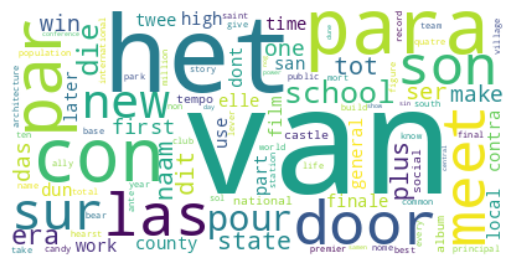

In [ ]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, # BACK UP
                    background_color="white",
                    collocations=False,
                    max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

Text(0, 0.5, 'Language')

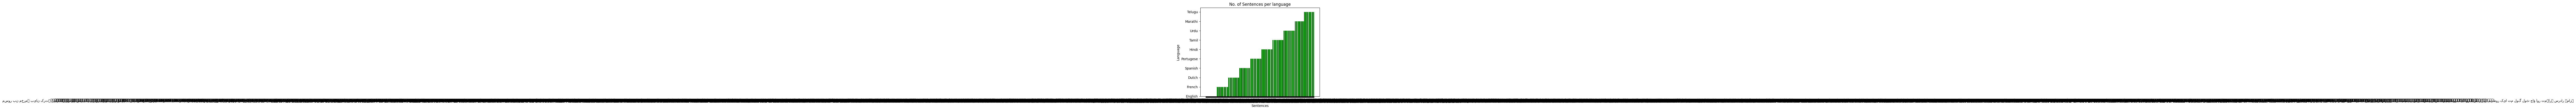

In [ ]:
X = list(data.iloc[:, 0])
Y = list(data.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("No. of Sentences per language")
plt.xlabel("Sentences")
plt.ylabel("Language")

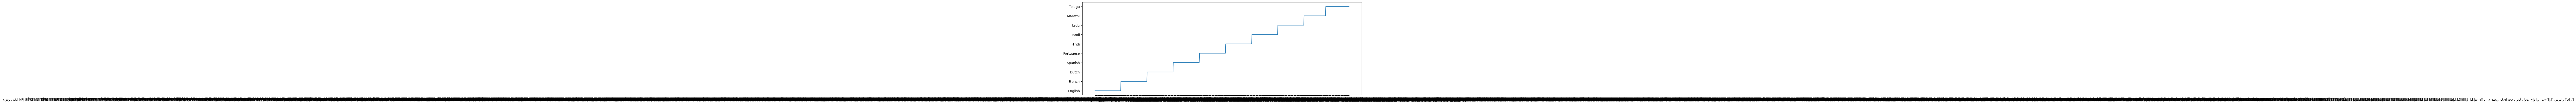

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X, Y)
plt.show()

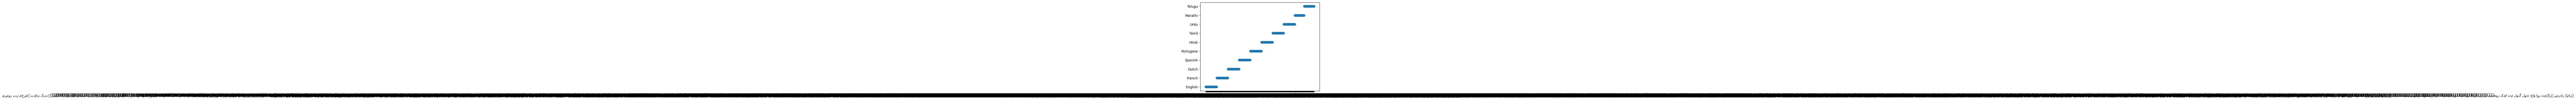

In [ ]:
plt.scatter(X,Y)

Train a Text classification model using ensemble/SVM techniques.Compare the results:
For this task, we can use the scikit-learn library to train an ensemble model, such as Random Forest, and an SVM model. We will split the dataset into training and testing sets, and then fit the models on the training set, and evaluate the accuracy of each model on the testing set.

In [ ]:
data.isnull().sum()

Sentences    0
dtype: int64

In [ ]:
data.dropna()

,Sentences
0,be institute gold medal the first recipient th...
1,saint build its identity green model environme...
2,state be spread across the state such way that...
3,road station north county transit sprinter lig...
4,talk about the internationalization the capita...
...,...
969,
970,
971,
972,


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Sentences    0
dtype: int64

In [ ]:
data=pd.read_excel(r"/content/Language_id.xlsx")

In [ ]:
data.head()

,Sentences,language
0,in johnson was awarded an american institute ...,English
1,bussy-saint-georges has built its identity on ...,English
2,minnesotas state parks are spread across the s...,English
3,nordahl road is a station served by north coun...,English
4,a talk by takis fotopoulos about the internati...,English


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Split the dataset into training and testing sets
train, test = train_test_split(data, test_size=0.2)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train['Sentences'])
test_vectors = vectorizer.transform(test['Sentences'])

# Train and evaluate a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_vectors, train['language'])
rf_preds = rf.predict(test_vectors)
rf_acc = accuracy_score(test['language'], rf_preds)
rf_precision = precision_score(test['language'], rf_preds,average='macro')
rf_recall = recall_score(test['language'], rf_preds,average='macro')
rf_f1 = f1_score(test['language'], rf_preds,average='macro')
rf_report = classification_report(test['language'], rf_preds)
print("Random Forest accuracy:", rf_acc)
print("Random Forest precision:", rf_precision)
print("Random Forest recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest classification report:\n", rf_report)

# Train and evaluate an SVM classifier
svm = SVC(kernel='linear')
svm.fit(train_vectors, train['language'])
svm_preds = svm.predict(test_vectors)
svm_acc = accuracy_score(test['language'], svm_preds)
svm_precision = precision_score(test['language'], svm_preds,average='macro')
svm_recall = recall_score(test['language'], svm_preds,average='macro')
svm_f1 = f1_score(test['language'], svm_preds,average='macro')
svm_report = classification_report(test['language'], svm_preds)
print("SVM accuracy:", svm_acc)
print("SVM precision:", svm_precision)
print("SVM recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM classification report:\n", svm_report)

Random Forest accuracy: 0.9846153846153847
Random Forest precision: 0.9835620915032679
Random Forest recall: 0.9843557422969187
Random Forest F1-score: 0.9836432266920072
Random Forest classification report:
               precision    recall  f1-score   support

       Dutch       1.00      0.95      0.98        21
     English       0.94      1.00      0.97        17
      French       0.95      0.95      0.95        20
       Hindi       1.00      1.00      1.00        19
     Marathi       0.94      1.00      0.97        16
   Portugese       1.00      0.94      0.97        17
     Spanish       1.00      1.00      1.00        28
       Tamil       1.00      1.00      1.00        23
      Telugu       1.00      1.00      1.00        21
        Urdu       1.00      1.00      1.00        13

    accuracy                           0.98       195
   macro avg       0.98      0.98      0.98       195
weighted avg       0.99      0.98      0.98       195

SVM accuracy: 0.9846153846153847

Train a Text classification model using Deep Learning techniques(SIngle lstm would do):
For this task, we can use the Keras library to train a single-layer LSTM neural network. We will first tokenize the text data, pad the sequences to a fixed length, and then train the LSTM on the training set. We will also use early stopping to prevent overfitting.

In [ ]:
data=pd.read_excel(r"/content/Language_id.xlsx")

In [ ]:
data['lanaguage'] = data['lanaguage'].map({'English':10,'Dutch':1,'French':2,'Hindi':3,'Marathi':4,'Portugese':5,'Spanish':6,'Tamil':7,'Telugu':8,'Urdu':9})

In [ ]:
data.isna().sum()

Sentences    0
lanaguage    0
dtype: int64

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Sentences'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X = tokenizer.texts_to_sequences(data['Sentences'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
Y = pd.get_dummies(data['lanaguage']).values
print('Shape of label tensor:', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 8
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Found 19948 unique tokens.
Shape of data tensor: (974, 250)
Shape of label tensor: (974, 10)
(876, 250) (876, 10)
(98, 250) (98, 10)
Epoch 1/8
13/13 [==============================] - 16s 966ms/step - loss: 2.2825 - accuracy: 0.2589 - val_loss: 2.2075 - val_accuracy: 0.3182
Epoch 2/8
13/13 [==============================] - 12s 922ms/step - loss: 2.0875 - accuracy: 0.4683 - val_loss: 1.9919 - val_accuracy: 0.4205
Epoch 3/8
13/13 [==============================] - 12s 935ms/step - loss: 1.7203 - accuracy: 0.4391 - val_loss: 1.5268 - val_accuracy: 0.3864
Epoch 4/8
13/13 [==============================] - 12s 938ms/step - loss: 1.2544 - accuracy: 0.6117 - val_loss: 1.2373 - val_accuracy: 0.5000
Epoch 5/8
13/13 [==============================] - 12s 939ms/step - loss: 0.9781 - accuracy: 0.7538 - val_loss: 0.9614 - val_accuracy: 0.8182
Epoch 6/8
13/13 [==============================] - 12s 934ms/step - loss: 0.6923 - accuracy: 0.8985 - val_loss: 0.6780 - val_accuracy: 0.8523
Epoch 7/8
13/13

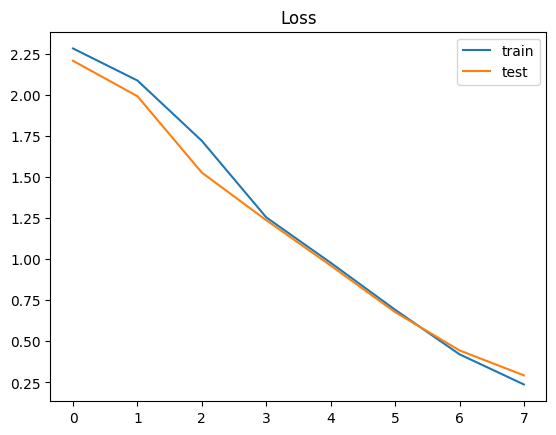

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

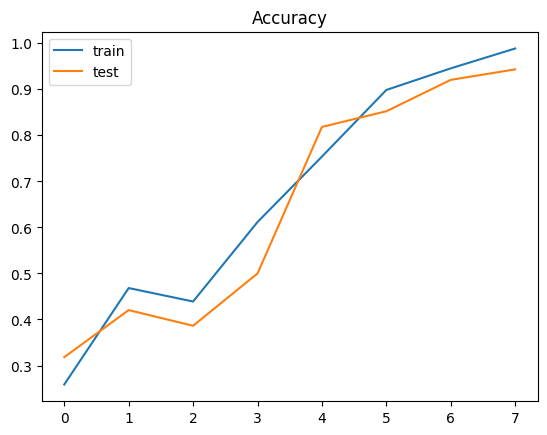

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['سانچہقرآن-سورہ  آیت ۔۔۔* الَّذِينَ يَسْتَحِبُّونَ الْحَيَاةَ الدُّنْيَا عَلَى الآخِرَةِ وَيَصُدُّونَ عَن سَبِيلِ اللّهِ وَيَبْغُونَهَا عِوَجًا أُوْلَـئِكَ فِي ضَلاَلٍ بَعِيدٍ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Dutch','French','Hindi','Marathi','Portugese','Spanish','Tamil','Telugu','Urdu','English']
print(pred,labels[np.argmax(pred)])

1/1 [==============================] - 0s 57ms/step
[[8.54087004e-04 5.53499849e-04 2.72756966e-04 1.40411709e-03
  9.34431050e-03 2.84475554e-03 3.86563763e-02 2.93119345e-03
  8.42682004e-01 1.00456946e-01]] Urdu


# Finish